<a href="https://colab.research.google.com/github/warrormac/Topicos-de-IA/blob/main/Version%202.0%20Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import datetime
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [290]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Obtenemos los Datos y los volvemos numericos 

In [291]:
# Set the start and end dates for data retrieval
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2020, 12, 31)
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']
indices = ['^GSPC', '^DJI']

# Download the stock data
df = yf.download(stocks, start=start_date, end=end_date)
index_df = yf.download(indices, start=start_date, end=end_date)

# Prepare the data
data = pd.DataFrame()
data['AAPL'] = pd.to_numeric(df['Adj Close']['AAPL'], errors='coerce')
data['AMZN'] = pd.to_numeric(df['Adj Close']['AMZN'], errors='coerce')
data['GOOGL'] = pd.to_numeric(df['Adj Close']['GOOGL'], errors='coerce')
data['MSFT'] = pd.to_numeric(df['Adj Close']['MSFT'], errors='coerce')
data['S&P500'] = pd.to_numeric(index_df['Adj Close']['^GSPC'], errors='coerce')
data['DowJones'] = pd.to_numeric(index_df['Adj Close']['^DJI'], errors='coerce')

# Drop any rows with missing values
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data.drop('MSFT', axis=1)  # Features (all columns except MSFT)
y = data['MSFT']  # Target variable
df.head(10)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed


Adj Close                                     Close           \
                 AAPL     AMZN      GOOGL       MSFT       AAPL     AMZN   
Date                                                                       
2015-01-02  24.565701  15.4260  26.477501  40.709457  27.332500  15.4260   
2015-01-05  23.873646  15.1095  25.973000  40.335106  26.562500  15.1095   
2015-01-06  23.875893  14.7645  25.332001  39.743092  26.565001  14.7645   
2015-01-07  24.210684  14.9210  25.257500  40.248043  26.937500  14.9210   
2015-01-08  25.140913  15.0230  25.345501  41.432064  27.972500  15.0230   
2015-01-09  25.167873  14.8465  25.035999  41.083828  28.002501  14.8465   
2015-01-12  24.547722  14.5705  24.853001  40.570171  27.312500  14.5705   
2015-01-13  24.765673  14.7370  25.090000  40.361229  27.555000  14.7370   
2015-01-14  24.671309  14.6635  25.296499  40.012989  27.450001  14.6635   
2015-01-15  24.001715  14.3475  25.200500  39.595089  26.705000  14.3475   

                                       High           ...        Low  \
                GOOGL       MSFT       AAPL     AMZN  ...      GOOGL   
Date                                                  ...              
2015-01-02  26.477501  46.759998  27.860001  15.7375  ...  26.393999   
2015-01-05  25.973000  46.330002  27.162500  15.4190  ...  25.887501   
2015-01-06  25.332001  45.650002  26.857500  15.1500  ...  25.277500   
2015-01-07  25.257500  46.230000  27.049999  15.0640  ...  25.182501   
2015-01-08  25.345501  47.590000  28.037500  15.1570  ...  24.750999   
2015-01-09  25.035999  47.189999  28.312500  15.1435  ...  24.932501   
2015-01-12  24.853001  46.599998  28.157499  14.9255  ...  24.545500   
2015-01-13  25.090000  46.360001  28.200001  15.0750  ...  24.863001   
2015-01-14  25.296499  45.959999  27.622499  14.7955  ...  24.908001   
2015-01-15  25.200500  45.480000  27.514999  14.8000  ...  25.100500   

                            Open                                    Volume  \
                 MSFT       AAPL     AMZN      GOOGL       MSFT       AAPL   
Date                                                                         
2015-01-02  46.540001  27.847500  15.6290  26.629999  46.660000  212818400   
2015-01-05  46.250000  27.072500  15.3505  26.357500  46.369999  257142000   
2015-01-06  45.540001  26.635000  15.1120  26.025000  46.380001  263188400   
2015-01-07  45.490002  26.799999  14.8750  25.547501  45.980000  160423600   
2015-01-08  46.720001  27.307501  15.0160  25.075500  46.750000  237458000   
2015-01-09  46.900002  28.167500  15.0740  25.409000  47.610001  214798000   
2015-01-12  46.360001  28.150000  14.8780  24.962000  47.419998  198603200   
2015-01-13  46.060001  27.857500  14.8740  25.128500  46.970001  268367600   
2015-01-14  45.619999  27.260000  14.5965  25.021000  45.959999  195826400   
2015-01-15  45.410000  27.500000  14.7000  25.444500  46.220001  240056000   

                                           
                 AMZN     GOOGL      MSFT  
Date                                       
2015-01-02   55664000  26480000  27913900  
2015-01-05   55484000  41182000  39673900  
2015-01-06   70380000  54456000  36447900  
2015-01-07   52806000  46918000  29114100  
2015-01-08   61768000  73054000  29645200  
2015-01-09   51848000  42000000  23944200  
2015-01-12   68428000  57138000  23651900  
2015-01-13   82728000  60958000  35270600  
2015-01-14  110774000  52800000  29719600  
2015-01-15   88384000  51068000  32750800  

[10 rows x 24 columns]

Mostramos los precios de acciones de AAPL, AMZN, GOOGL y MSFT

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2015-01-02 to 2020-12-30
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   1510 non-null   float64
 1   (Adj Close, AMZN)   1510 non-null   float64
 2   (Adj Close, GOOGL)  1510 non-null   float64
 3   (Adj Close, MSFT)   1510 non-null   float64
 4   (Close, AAPL)       1510 non-null   float64
 5   (Close, AMZN)       1510 non-null   float64
 6   (Close, GOOGL)      1510 non-null   float64
 7   (Close, MSFT)       1510 non-null   float64
 8   (High, AAPL)        1510 non-null   float64
 9   (High, AMZN)        1510 non-null   float64
 10  (High, GOOGL)       1510 non-null   float64
 11  (High, MSFT)        1510 non-null   float64
 12  (Low, AAPL)         1510 non-null   float64
 13  (Low, AMZN)         1510 non-null   float64
 14  (Low, GOOGL)        1510 non-null   float64
 15  (Low, MSFT)         1510 non-null   f

In [293]:
df["High"].value_counts()

AAPL        AMZN        GOOGL      MSFT      
22.917500   35.962502   36.564499  51.900002     1
48.415001   92.000000   63.750000  108.820000    1
48.797501   94.002502   64.571999  110.180000    1
48.742500   80.723999   53.622002  108.879997    1
48.740002   94.784500   55.063999  133.729996    1
                                                ..
32.622501   41.688999   41.200001  64.620003     1
32.605000   19.594000   28.058500  43.610001     1
32.570000   19.295000   28.799500  44.189999     1
32.544998   21.944500   27.741501  46.919998     1
138.789993  167.532501  89.423500  227.179993    1
Length: 1510, dtype: int64

In [294]:
df.describe()

Adj Close                                               Close  \
              AAPL         AMZN        GOOGL         MSFT         AAPL   
count  1510.000000  1510.000000  1510.000000  1510.000000  1510.000000   
mean     46.072762    68.798972    50.950398    94.662877    48.061589   
std      25.225302    39.538892    14.984982    51.976142    25.004723   
min      20.883030    14.347500    24.853001    35.172405    22.584999   
25%      27.343988    36.388124    38.550752    49.945611    29.813750   
50%      39.451429    59.735750    51.987249    80.926014    41.313749   
75%      51.922711    91.450748    60.199375   130.280540    53.870626   
max     134.862671   176.572495    91.248497   226.430389   136.690002   

                                                     High               ...  \
              AMZN        GOOGL         MSFT         AAPL         AMZN  ...   
count  1510.000000  1510.000000  1510.000000  1510.000000  1510.000000  ...   
mean     68.798972    50.950398    99.731344    48.547028    69.535141  ...   
std      39.538892    14.984982    51.802905    25.384887    40.084942  ...   
min      14.347500    24.853001    40.290001    22.917500    14.539500  ...   
25%      36.388124    38.550752    55.720000    29.980625    36.518750  ...   
50%      59.735750    51.987249    86.149998    41.872499    60.270750  ...   
75%      91.450748    60.199375   135.250000    54.767499    92.246000  ...   
max     176.572495    91.248497   231.649994   138.789993   177.612503  ...   

               Low                      Open                            \
             GOOGL         MSFT         AAPL         AMZN        GOOGL   
count  1510.000000  1510.000000  1510.000000  1510.000000  1510.000000   
mean     50.442936    98.686411    48.030871    68.818168    50.936961   
std      14.796756    51.110603    25.002115    39.580860    14.965625   
min      24.545500    39.720001    22.500000    14.314000    24.962000   
25%      38.222001    55.135000    29.700624    36.328001    38.524375   
50%      51.328749    85.450001    41.353750    59.936501    52.000750   
75%      59.560375   133.565006    54.072499    91.435627    60.054252   
max      90.849998   227.350006   138.050003   177.350006    91.027000   

                          Volume                                            
              MSFT          AAPL          AMZN         GOOGL          MSFT  
count  1510.000000  1.510000e+03  1.510000e+03  1.510000e+03  1.510000e+03  
mean     99.700874  1.459689e+08  8.630059e+07  3.772286e+07  3.055705e+07  
std      51.795065  7.143634e+07  4.448731e+07  1.876580e+07  1.484001e+07  
min      40.340000  4.544800e+07  1.762600e+07  9.312000e+06  7.425600e+06  
25%      55.670000  9.743670e+07  5.710850e+07  2.656000e+07  2.144492e+07  
50%      86.250000  1.280432e+08  7.470400e+07  3.304300e+07  2.696040e+07  
75%     134.980003  1.755003e+08  1.020335e+08  4.260000e+07  3.474908e+07  
max     229.270004  6.488252e+08  4.771220e+08  2.571620e+08  1.691640e+08  

[8 rows x 24 columns]

<ipython-input-295-716e7f01d495>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[stock], label=stock, palette='Set1')
<ipython-input-295-716e7f01d495>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[stock], label=stock, palette='Set1')
<ipython-input-295-716e7f01d495>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[stock], label=stock, palette='Set1')
<ipython-input-295-716e7f01d495>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[stock], label=stock, palette='Set1')


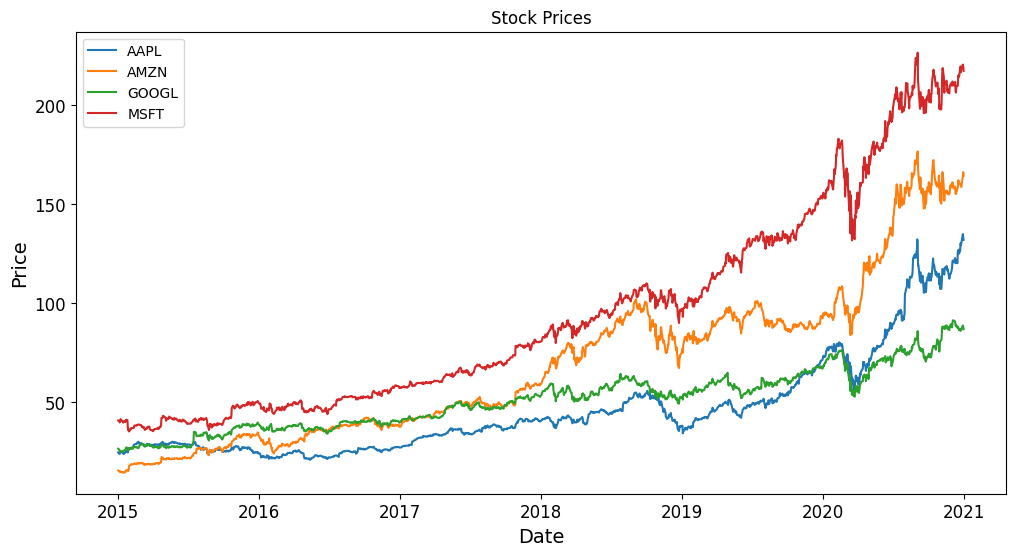

In [295]:
# Plot the stock prices on the same chart
plt.figure(figsize=(12, 6))
for stock in ['AAPL', 'AMZN', 'GOOGL', 'MSFT']:
    sns.lineplot(data=data[stock], label=stock, palette='Set1')

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mostramos el Promedio anua, mensual y la suma de precios mensuales de DownJons y S&P500

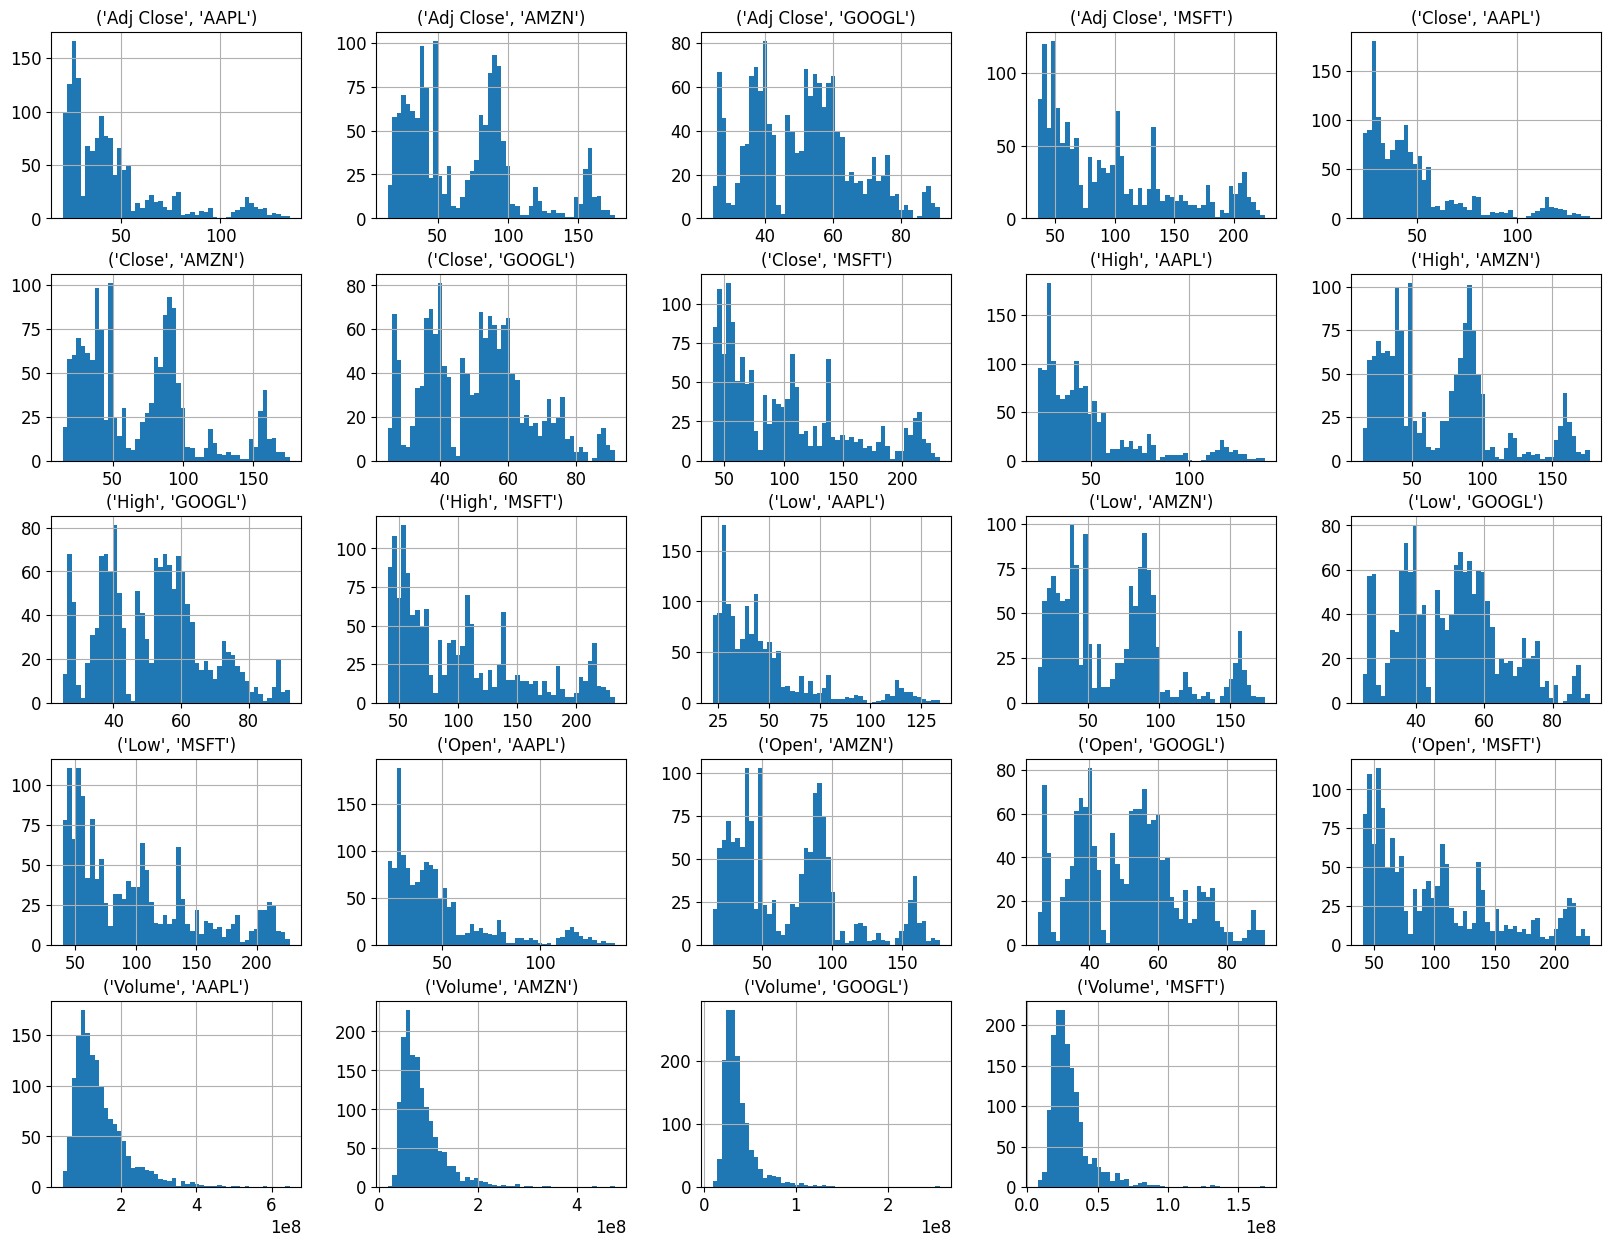

In [296]:
%matplotlib inline
from google.colab import files
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.savefig("graficos_caracteristicas.png")
plt.show()

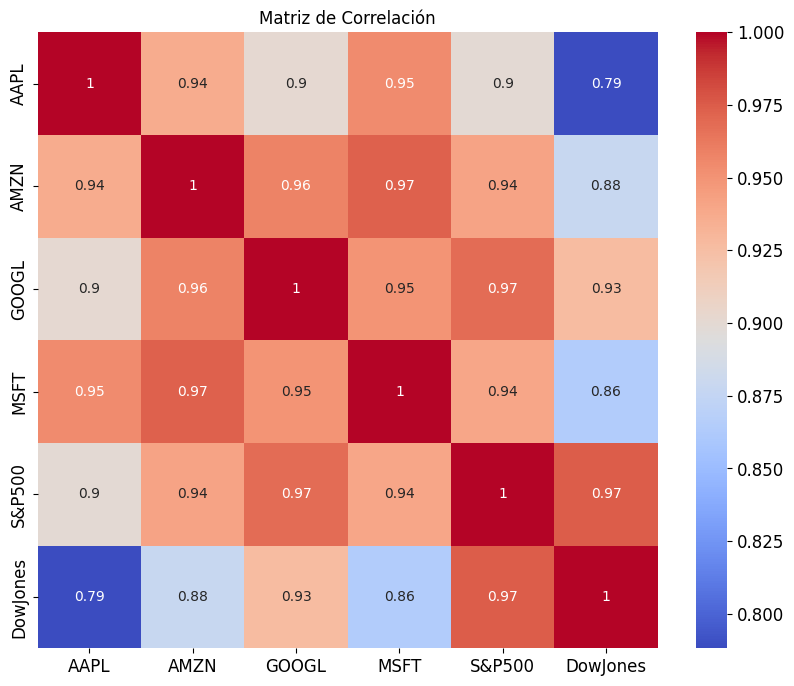

In [297]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [298]:
# Realizar la transformación de series de tiempo con un time delay de 5 días
lagged_data = pd.DataFrame()
for i in range(5):
    lagged_data[f'AAPL_Lag{i+1}'] = data['AAPL'].shift(i+1)
    lagged_data[f'AMZN_Lag{i+1}'] = data['AMZN'].shift(i+1)
    lagged_data[f'GOOGL_Lag{i+1}'] = data['GOOGL'].shift(i+1)
    lagged_data[f'MSFT_Lag{i+1}'] = data['MSFT'].shift(i+1)
    lagged_data[f'S&P500_Lag{i+1}'] = data['S&P500'].shift(i+1)
    lagged_data[f'DowJones_Lag{i+1}'] = data['DowJones'].shift(i+1)

lagged_data['AAPL'] = data['AAPL']  # Variable dependiente

# Eliminar filas con valores nulos generados por el time delay
lagged_data.dropna(inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = lagged_data.drop('AAPL', axis=1)  # Variables independientes
y = lagged_data['AAPL']  # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df.info()


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones for bias term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2015-01-02 to 2020-12-30
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   1510 non-null   float64
 1   (Adj Close, AMZN)   1510 non-null   float64
 2   (Adj Close, GOOGL)  1510 non-null   float64
 3   (Adj Close, MSFT)   1510 non-null   float64
 4   (Close, AAPL)       1510 non-null   float64
 5   (Close, AMZN)       1510 non-null   float64
 6   (Close, GOOGL)      1510 non-null   float64
 7   (Close, MSFT)       1510 non-null   float64
 8   (High, AAPL)        1510 non-null   float64
 9   (High, AMZN)        1510 non-null   float64
 10  (High, GOOGL)       1510 non-null   float64
 11  (High, MSFT)        1510 non-null   float64
 12  (Low, AAPL)         1510 non-null   float64
 13  (Low, AMZN)         1510 non-null   float64
 14  (Low, GOOGL)        1510 non-null   float64
 15  (Low, MSFT)         1510 non-null   f

Ahora separamos los datos en los respectivos conjuntos, train test y validation

In [299]:
from sklearn.model_selection import train_test_split
train_set, validation_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [300]:
train_set.head()

Adj Close                                       Close             \
                 AAPL       AMZN      GOOGL       MSFT       AAPL       AMZN   
Date                                                                           
2017-08-17  37.335827  48.028500  46.382999  67.669960  39.465000  48.028500   
2017-05-19  36.058960  47.992001  47.732498  62.932388  38.264999  47.992001   
2018-07-11  44.950157  87.750000  58.573002  96.663315  46.970001  87.750000   
2017-03-01  32.797352  42.653999  42.837502  60.031586  34.947498  42.653999   
2016-09-07  25.184240  39.223999  40.399502  52.625103  27.090000  39.223999   

                                        High             ...        Low  \
                GOOGL        MSFT       AAPL       AMZN  ...      GOOGL   
Date                                                     ...              
2017-08-17  46.382999   72.400002  40.177502  48.891998  ...  46.382000   
2017-05-19  47.732498   67.690002  38.494999  48.445999  ...  47.599998   
2018-07-11  58.573002  101.980003  47.445000  87.848000  ...  57.768501   
2017-03-01  42.837502   64.940002  35.037498  42.741501  ...  42.451000   
2016-09-07  40.399502   57.660000  27.190001  39.539501  ...  40.186001   

                             Open                                    \
                  MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2017-08-17   72.400002  40.130001  48.891998  47.147499   73.580002   
2017-05-19   67.430000  38.345001  48.141998  47.640999   67.500000   
2018-07-11  101.099998  47.125000  86.899498  57.780998  101.150002   
2017-03-01   64.019997  34.472500  42.652500  42.569000   64.129997   
2016-09-07   57.410000  26.957500  39.476501  40.396500   57.470001   

               Volume                                
                 AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2017-08-17  111762400  70248000  33914000  22977500  
2017-05-19  107843200  79442000  27206000  26961100  
2018-07-11   75326000  64196000  33252000  19644600  
2017-03-01  145658400  55202000  36374000  26937500  
2016-09-07  169457200  48492000  22906000  17493400  

[5 rows x 24 columns]

Lo siguiente es el stratified_split para mantener las proporciones originales

In [301]:
df["tag"] = df.loc[:, 'High']['AAPL']
# Etiquetar tag como 1.0=bajo, 2.0=promedio, 3.0=alto
df.loc[df['High']['AAPL'] <= 25, 'tag'] = 1.0
df.loc[(df['High']['AAPL'] > 25) & (df['High']['AAPL'] <= 50), 'tag'] = 2.0
df.loc[df['High']['AAPL'] > 50, 'tag'] = 3.0

In [302]:
df['tag'].value_counts()

2.0    948
3.0    477
1.0     85
Name: tag, dtype: int64

<Axes: >

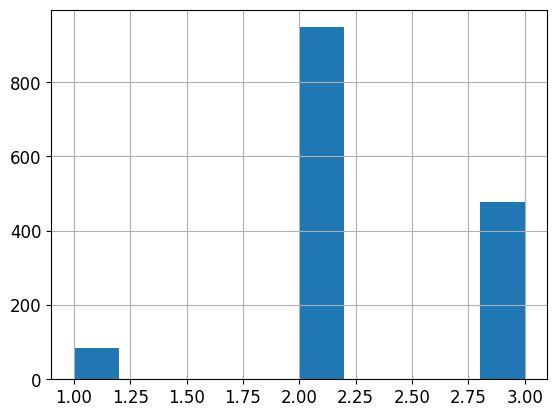

In [303]:
df["tag"].hist()

In [304]:
from sklearn.model_selection import StratifiedShuffleSplit

# Reset the index of the DataFrame
df.reset_index(inplace=True, drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["tag"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [305]:
strat_test_set["tag"].value_counts() / len(strat_test_set)

2.0    0.629139
3.0    0.314570
1.0    0.056291
Name: tag, dtype: float64

In [306]:
df["tag"].value_counts() / len(df)

2.0    0.627815
3.0    0.315894
1.0    0.056291
Name: tag, dtype: float64

In [307]:
def tag_proportions(data):
    return data["tag"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": tag_proportions(df),
    "Stratified": tag_proportions(strat_test_set),
    "Random": tag_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [308]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.056291,0.056291,0.056291,-1.421085e-14,-1.421085e-14
2.0,0.627815,0.629139,0.599338,-4.535865e+00,2.109705e-01
3.0,0.315894,0.314570,0.344371,9.014675e+00,-4.192872e-01


Visualizar data para ganar insights

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='AMZN', ylabel='AAPL'>,
        <Axes: xlabel='GOOGL', ylabel='AAPL'>,
        <Axes: xlabel='MSFT', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='AMZN'>,
        <Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='GOOGL', ylabel='AMZN'>,
        <Axes: xlabel='MSFT', ylabel='AMZN'>],
       [<Axes: xlabel='AAPL', ylabel='GOOGL'>,
        <Axes: xlabel='AMZN', ylabel='GOOGL'>,
        <Axes: xlabel='GOOGL', ylabel='GOOGL'>,
        <Axes: xlabel='MSFT', ylabel='GOOGL'>],
       [<Axes: xlabel='AAPL', ylabel='MSFT'>,
        <Axes: xlabel='AMZN', ylabel='MSFT'>,
        <Axes: xlabel='GOOGL', ylabel='MSFT'>,
        <Axes: xlabel='MSFT', ylabel='MSFT'>]], dtype=object)

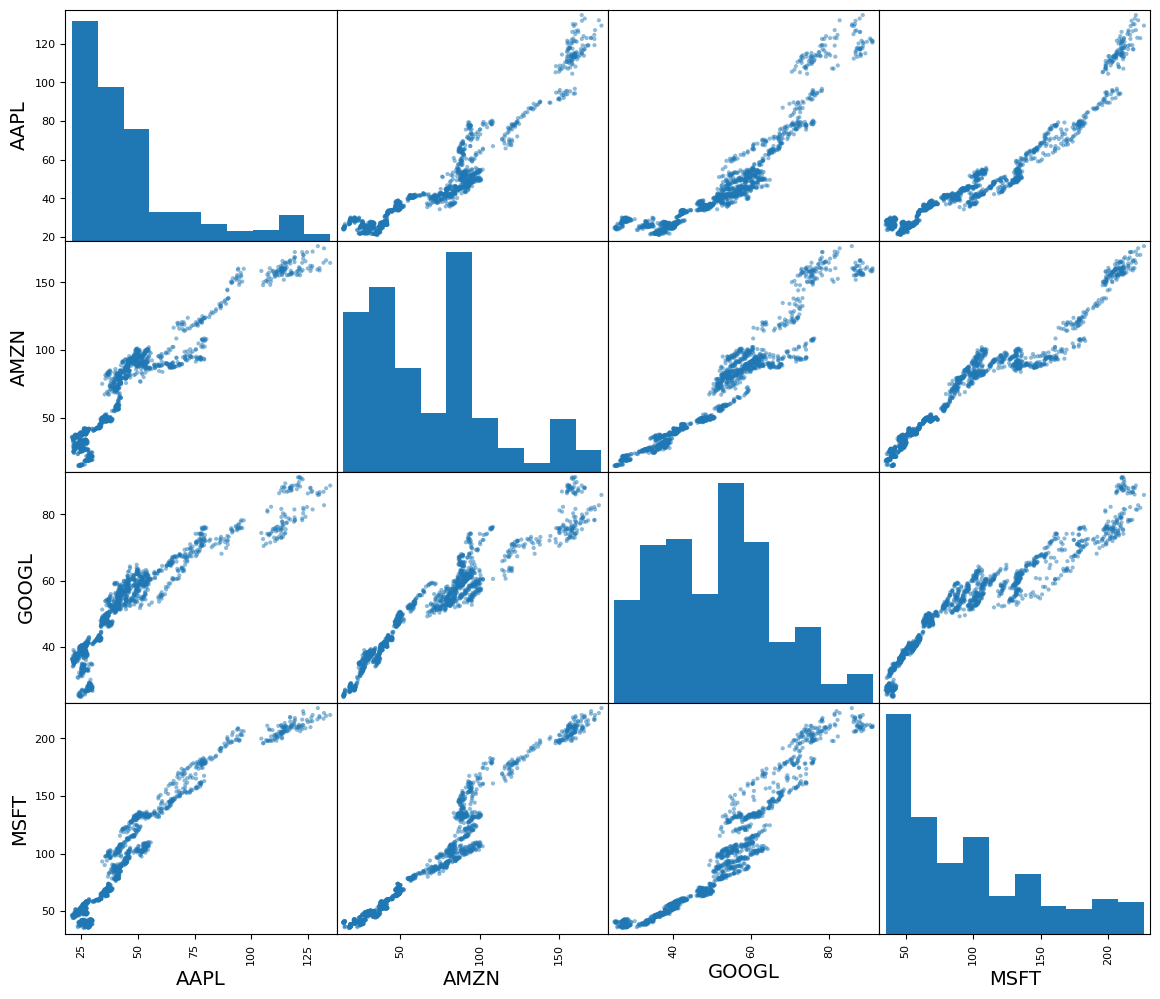

In [309]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# Define the attributes for scatter matrix plot
attributes = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']

# Create the scatter matrix plot
scatter_matrix(data[attributes], figsize=(14, 12))

Preparar la data para los algoritmos



In [310]:
# Set the start and end dates for data retrieval
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2020, 12, 31)

# Define the stock symbols
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']

# Download the stock data
df = yf.download(stocks, start=start_date, end=end_date)

# Obtain data for the month of April 2023
start_date_pred = datetime.datetime(2023, 4, 1)
end_date_pred = datetime.datetime(2023, 4, 30)
df_pred = yf.download(stocks, start=start_date_pred, end=end_date_pred)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [311]:

# Prepare the data
data = pd.DataFrame()
data['AAPL'] = pd.to_numeric(df['Adj Close']['AAPL'], errors='coerce')
data['AMZN'] = pd.to_numeric(df['Adj Close']['AMZN'], errors='coerce')
data['GOOGL'] = pd.to_numeric(df['Adj Close']['GOOGL'], errors='coerce')
data['MSFT'] = pd.to_numeric(df['Adj Close']['MSFT'], errors='coerce')

# Combine the target variable with the features
data_pred = pd.DataFrame()
data_pred['AAPL'] = pd.to_numeric(df_pred['Adj Close']['AAPL'], errors='coerce')
data_pred['AMZN'] = pd.to_numeric(df_pred['Adj Close']['AMZN'], errors='coerce')
data_pred['GOOGL'] = pd.to_numeric(df_pred['Adj Close']['GOOGL'], errors='coerce')
data_pred['MSFT'] = pd.to_numeric(df_pred['Adj Close']['MSFT'], errors='coerce')

# Split the data into training and testing sets
split_ratio = 0.7  # Set the ratio for training and testing data (e.g., 70-30)
split_index = int(len(data) * split_ratio)
data_train = data[:split_index]
data_test = data[split_index:]

# Apply feature scaling to the training data
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

# Apply feature scaling to the testing data
data_test_scaled = scaler.transform(data_test)

# Split the training data into features (X) and target variable (y)
X_train_scaled = np.c_[np.ones(data_train_scaled.shape[0]), data_train_scaled[:, :-1]]
y_train = data_train_scaled[:, -1]

# Split the testing data into features (X) and target variable (y)
X_test_scaled = np.c_[np.ones(data_test_scaled.shape[0]), data_test_scaled[:, :-1]]
y_test = data_test_scaled[:, -1]

In [312]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


def transformCat_to_Num(serie_data_cat):
    encoder = LabelEncoder()
    serie_data_cat_encoded = encoder.fit_transform(serie_data_cat)
    return serie_data_cat_encoded

In [313]:
from sklearn.preprocessing import StandardScaler
#normalizar
def trasnform_normalize_data(df_data_num):
    scaler = StandardScaler(with_std=True,with_mean=True).fit(df_data_num)
    scaler_data = scaler.transform(df_data_num)
    return pd.DataFrame(scaler_data,columns=df_data_num.columns) 

In [314]:
def pipeline(df_data, label_cat):
    df_data_num = df_data.drop(label_cat, axis=1)
    serie_data_cat = df_data[label_cat]
    
    serie_data_cat_encoded = transformCat_to_Num(serie_data_cat)
    df_data_num = trasnform_normalize_data(df_data_num)
    
    df_data_tr = df_data_num.copy()
    df_data_tr[label_cat] = serie_data_cat_encoded
    return df_data_tr

In [315]:
df_preparado = df  # Assign the DataFrame without the 'Volume' column to df_preparado
df_labels = strat_train_set["Adj Close"].copy()
df_preparado.head()

Adj Close                                     Close           \
                 AAPL     AMZN      GOOGL       MSFT       AAPL     AMZN   
Date                                                                       
2015-01-02  24.565699  15.4260  26.477501  40.709465  27.332500  15.4260   
2015-01-05  23.873638  15.1095  25.973000  40.335110  26.562500  15.1095   
2015-01-06  23.875891  14.7645  25.332001  39.743092  26.565001  14.7645   
2015-01-07  24.210686  14.9210  25.257500  40.248051  26.937500  14.9210   
2015-01-08  25.140909  15.0230  25.345501  41.432068  27.972500  15.0230   

                                       High           ...        Low  \
                GOOGL       MSFT       AAPL     AMZN  ...      GOOGL   
Date                                                  ...              
2015-01-02  26.477501  46.759998  27.860001  15.7375  ...  26.393999   
2015-01-05  25.973000  46.330002  27.162500  15.4190  ...  25.887501   
2015-01-06  25.332001  45.650002  26.857500  15.1500  ...  25.277500   
2015-01-07  25.257500  46.230000  27.049999  15.0640  ...  25.182501   
2015-01-08  25.345501  47.590000  28.037500  15.1570  ...  24.750999   

                            Open                                    Volume  \
                 MSFT       AAPL     AMZN      GOOGL       MSFT       AAPL   
Date                                                                         
2015-01-02  46.540001  27.847500  15.6290  26.629999  46.660000  212818400   
2015-01-05  46.250000  27.072500  15.3505  26.357500  46.369999  257142000   
2015-01-06  45.540001  26.635000  15.1120  26.025000  46.380001  263188400   
2015-01-07  45.490002  26.799999  14.8750  25.547501  45.980000  160423600   
2015-01-08  46.720001  27.307501  15.0160  25.075500  46.750000  237458000   

                                          
                AMZN     GOOGL      MSFT  
Date                                      
2015-01-02  55664000  26480000  27913900  
2015-01-05  55484000  41182000  39673900  
2015-01-06  70380000  54456000  36447900  
2015-01-07  52806000  46918000  29114100  
2015-01-08  61768000  73054000  29645200  

[5 rows x 24 columns]

Entrenamiento de Modelos

In [316]:
import numpy as np
class class_logistic_Regression:
    params_thetas = np.zeros((6,1))
    def __init__(self, lr =0.01, 
                         i=100):
        self.learning_rate = lr
        self.iterations =  i
        
    def __str__(self):
        return "Own_LogisticRegression"
    
    def preparate_data(self,x_data, y_data):
        x_data = x_data.to_numpy()
        y_data = y_data.to_numpy().reshape(len(y_data),1)
        
        m = len(y_data)
        
        x_data = np.hstack((np.ones((m,1)),x_data))
        return x_data, y_data
    
    def preparate_data_numpy(self,x_data, y_data):
        y_data = y_data.reshape(len(y_data),1)
        m = len(y_data)
        x_data = np.hstack((np.ones((m,1)),x_data))
        return x_data, y_data
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self,X):
        return np.round(self.sigmoid(X.dot(self.params_thetas)))
    
    def compute_cost(self,X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.params_thetas))

        y = y.T
        cost = (1/m)*((-y).dot(np.log(h))-(1-y).dot(np.log(1-h)))

        return cost
    
    def fit(self,x_data, y_Data):
        m = len(y_Data)
        x_data_pr = np.hstack((np.ones((m,1)),x_data))
        y_Data = y_Data.reshape(m,1)
 
        self.gradient_descent(x_data_pr,y_Data)

    def gradient_descent(X, y, alpha=0.01, num_iterations=1000):
        m = len(y)  # Number of training examples
        n = X.shape[1]  # Number of features
        theta = np.zeros(n)  # Initialize theta with zeros

        for iteration in range(num_iterations):
          # Calculate predictions
          predictions = np.dot(X, theta)

          # Calculate error
          error = predictions - y

          # Calculate gradient
          gradient = (1 / m) * np.dot(X.T, error)
 
          # Update theta
          theta -= alpha * gradient

        return theta

    
    # Regularized linear regression function
    def regularized_regression(X, y, alpha=1.0):
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        return ridge.coef_

In [317]:
logistic_regression = class_logistic_Regression()
df_preparado


Adj Close                                          Close  \
                  AAPL        AMZN      GOOGL        MSFT        AAPL   
Date                                                                    
2015-01-02   24.565699   15.426000  26.477501   40.709465   27.332500   
2015-01-05   23.873638   15.109500  25.973000   40.335110   26.562500   
2015-01-06   23.875891   14.764500  25.332001   39.743092   26.565001   
2015-01-07   24.210686   14.921000  25.257500   40.248051   26.937500   
2015-01-08   25.140909   15.023000  25.345501   41.432068   27.972500   
...                ...         ...        ...         ...         ...   
2020-12-23  129.209290  159.263504  86.411499  216.605484  130.960007   
2020-12-24  130.205795  158.634506  86.708000  218.300934  131.970001   
2020-12-28  134.862686  164.197998  88.697998  220.466812  136.690002   
2020-12-29  133.066986  166.100006  87.888000  219.672974  134.869995   
2020-12-30  131.932388  164.292496  86.812500  217.252289  133.720001   

                                                     High              ...  \
                  AMZN      GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                   ...   
2015-01-02   15.426000  26.477501   46.759998   27.860001   15.737500  ...   
2015-01-05   15.109500  25.973000   46.330002   27.162500   15.419000  ...   
2015-01-06   14.764500  25.332001   45.650002   26.857500   15.150000  ...   
2015-01-07   14.921000  25.257500   46.230000   27.049999   15.064000  ...   
2015-01-08   15.023000  25.345501   47.590000   28.037500   15.157000  ...   
...                ...        ...         ...         ...         ...  ...   
2020-12-23  159.263504  86.411499  221.020004  132.429993  160.506500  ...   
2020-12-24  158.634506  86.708000  222.750000  133.460007  160.100006  ...   
2020-12-28  164.197998  88.697998  224.960007  137.339996  165.199997  ...   
2020-12-29  166.100006  87.888000  224.149994  138.789993  167.532501  ...   
2020-12-30  164.292496  86.812500  221.679993  135.990005  167.104996  ...   

                  Low                    Open                         \
                GOOGL        MSFT        AAPL        AMZN      GOOGL   
Date                                                                   
2015-01-02  26.393999   46.540001   27.847500   15.629000  26.629999   
2015-01-05  25.887501   46.250000   27.072500   15.350500  26.357500   
2015-01-06  25.277500   45.540001   26.635000   15.112000  26.025000   
2015-01-07  25.182501   45.490002   26.799999   14.875000  25.547501   
2015-01-08  24.750999   46.720001   27.307501   15.016000  25.075500   
...               ...         ...         ...         ...        ...   
2020-12-23  86.059998  220.800003  132.160004  160.250000  86.196503   
2020-12-24  86.217499  221.199997  131.320007  159.695007  86.449997   
2020-12-28  87.091003  223.020004  133.990005  159.699997  87.245499   
2020-12-29  87.755501  223.580002  138.050003  165.496994  89.361504   
2020-12-30  86.400002  221.470001  135.580002  167.050003  88.250000   

                           Volume                                 
                  MSFT       AAPL       AMZN     GOOGL      MSFT  
Date                                                              
2015-01-02   46.660000  212818400   55664000  26480000  27913900  
2015-01-05   46.369999  257142000   55484000  41182000  39673900  
2015-01-06   46.380001  263188400   70380000  54456000  36447900  
2015-01-07   45.980000  160423600   52806000  46918000  29114100  
2015-01-08   46.750000  237458000   61768000  73054000  29645200  
...                ...        ...        ...       ...       ...  
2020-12-23  223.110001   88223700   41876000  22974000  18699600  
2020-12-24  221.419998   54930100   29038000   9312000  10550600  
2020-12-28  224.449997  124486200  113736000  27650000  17933500  
2020-12-29  226.309998  121047300   97458000  19726000  17403200  
2020-12-30  225.2

Regresio Persoal

In [420]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime

# Obtener datos de Yahoo Finance
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2022, 4, 30)  # Update the end date to April 2022
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']
df = yf.download(stocks, start=start_date, end=end_date)

# Obtener datos de índices de Yahoo Finance
index_df = yf.download('^GSPC ^DJI', start=start_date, end=end_date)

# Prepare the data
data = pd.DataFrame()
data['AAPL'] = pd.to_numeric(df['Adj Close']['AAPL'], errors='coerce')
data['AMZN'] = pd.to_numeric(df['Adj Close']['AMZN'], errors='coerce')
data['GOOGL'] = pd.to_numeric(df['Adj Close']['GOOGL'], errors='coerce')
data['MSFT'] = pd.to_numeric(df['Adj Close']['MSFT'], errors='coerce')

# Drop any rows with missing values
data.dropna(inplace=True)

# Split the data into training and testing sets
split_ratio = 0.7  # Set the ratio for training and testing data (e.g., 70-30)
split_index = int(len(data) * split_ratio)
data_train = data[:split_index]
data_test = data[split_index:]

# Apply feature scaling to the training data
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

# Apply feature scaling to the testing data
data_test_scaled = scaler.transform(data_test)

# Split the training data into features (X) and target variable (y)
X_train_scaled = np.c_[np.ones(data_train_scaled.shape[0]), data_train_scaled[:, :-1]]
y_train = data_train_scaled[:, -1]

# Split the testing data into features (X) and target variable (y)
X_test_scaled = np.c_[np.ones(data_test_scaled.shape[0]), data_test_scaled[:, :-1]]
y_test = data_test_scaled[:, -1]
     
# Realizar la transformación de series de tiempo con un time delay de 5 días
lagged_data = pd.DataFrame()
for i in range(5):
    lagged_data[f'AAPL_Lag{i+1}'] = data['AAPL'].shift(i+1)
    lagged_data[f'AMZN_Lag{i+1}'] = data['AMZN'].shift(i+1)
    lagged_data[f'GOOGL_Lag{i+1}'] = data['GOOGL'].shift(i+1)
    lagged_data[f'MSFT_Lag{i+1}'] = data['MSFT'].shift(i+1)

lagged_data['AAPL'] = data['AAPL']  # Variable dependiente

# Eliminar filas con valores nulos generados por el time delay
lagged_data.dropna(inplace=True)

# Calculate theta using the normal equations
theta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train

# Prepare the new data for prediction
new_data = pd.DataFrame()
new_data['AAPL'] = df['Adj Close']['AAPL'][-5:].values
new_data['AMZN'] = df['Adj Close']['AMZN'][-5:].values
new_data['GOOGL'] = df['Adj Close']['GOOGL'][-5:].values
new_data['MSFT'] = df['Adj Close']['MSFT'][-5:].values

# Add bias column to the new data
new_data_with_bias = new_data.copy()
new_data_with_bias['bias'] = 1

# Ensure the column order of the new data matches the training data
column_names = list(data_train.columns[:-1]) + ['bias']
new_data_with_bias = pd.DataFrame(new_data_with_bias, columns=column_names)

# Normalize the new data using the mean and standard deviation of the training data
epsilon = 1e-8
new_data_with_bias_normalized = (new_data_with_bias - X_train_scaled.mean(axis=0)) / (X_train_scaled.std(axis=0) + epsilon)

# Make predictions on the new data
predictions = new_data_with_bias_normalized @ theta



# Print the predicted stock prices for Apple in April 2023
print("Predicted Stock Prices for Apple in April 2023:")
for date, price in zip(df_pred.index, y_pred_inverse[:, -1]):
    print(date.date(), ": $", price)



[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed
Predicted Stock Prices for Apple in April 2023:
2023-04-03 : $ 396.36795343932585
2023-04-04 : $ 395.94224948320357
2023-04-05 : $ 395.5150093340518
2023-04-06 : $ 395.08626391836617
2023-04-10 : $ 394.65604424969314
2023-04-11 : $ 394.22438142457906
2023-04-12 : $ 393.7913066185177
2023-04-13 : $ 393.35685108189074
2023-04-14 : $ 392.9210461359084
2023-04-17 : $ 392.4839231685455
2023-04-18 : $ 392.0455136304786
2023-04-19 : $ 391.6058490310212
2023-04-20 : $ 391.16496093405834
2023-04-21 : $ 390.72288095398443
2023-04-24 : $ 390.27964075164084
2023-04-25 : $ 389.83527203025665
2023-04-26 : $ 389.3898065313929
2023-04-27 : $ 388.94327603089016
2023-04-28 : $ 388.49571233482146


1. Regresion Multivariada


In [318]:
# Gradient descent function
def gradient_descent(X, y, alpha=0.01, num_iterations=1000):
    m = len(y)  # Number of training examples
    n = X.shape[1]  # Number of features
    theta = np.zeros(n)  # Initialize theta with zeros

    for iteration in range(num_iterations):
#        # Calculate predictions
        predictions = np.dot(X, theta)

        # Calculate error
        error = predictions - y

        # Calculate gradient
        gradient = (1 / m) * np.dot(X.T, error)

        # Update theta
        theta -= alpha * gradient

    return theta

In [319]:
# Run gradient descent on the training data
theta = gradient_descent(X_train_scaled, y_train, alpha=0.01, num_iterations=1000)

# Prepare the data for prediction in April 2023
data_pred_scaled = scaler.transform(data_pred)
X_pred_scaled = np.c_[np.ones(data_pred_scaled.shape[0]), data_pred_scaled[:, :-1]]

# Make predictions for April 2023
y_pred = np.dot(X_pred_scaled, theta)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(np.c_[data_pred_scaled[:, :-1], y_pred])


In [320]:
# Calculate the mean squared error
mse = mean_squared_error(data_pred['AAPL'], y_pred_inverse[:, -1])
print("Mean Squared Error:", mse)

# Print the predicted stock prices for Apple in April 2023
print("Predicted Stock Prices for Apple in April 2023:")
for date, price in zip(df_pred.index, y_pred_inverse[:, -1]):
    print(date.date(), ": $", price)





Mean Squared Error: 1750.0629107784557
Predicted Stock Prices for Apple in April 2023:
2023-04-03 : $ 206.13889129770834
2023-04-04 : $ 206.80882717552896
2023-04-05 : $ 204.23738265178932
2023-04-06 : $ 207.85346974366195
2023-04-10 : $ 205.0979630064994
2023-04-11 : $ 202.60626078049876
2023-04-12 : $ 200.74357511210764
2023-04-13 : $ 207.85494793133276
2023-04-14 : $ 208.67846748065224
2023-04-17 : $ 206.84978594182985
2023-04-18 : $ 206.34923163163606
2023-04-19 : $ 207.73524616564364
2023-04-20 : $ 207.69826205087602
2023-04-21 : $ 208.35924232944086
2023-04-24 : $ 208.55359177302816
2023-04-25 : $ 204.52428868887645
2023-04-26 : $ 205.56890315110485
2023-04-27 : $ 213.08620024657736
2023-04-28 : $ 211.55639012349332


2. Regresion lineal

In [321]:


# Download the stock data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Obtain data for the month of April 2023
start_date_pred = datetime.datetime(2023, 4, 1)
end_date_pred = datetime.datetime(2023, 4, 30)
data_pred = yf.download(stocks, start=start_date_pred, end=end_date_pred)['Adj Close']


# Perform linear regression on the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lin_reg.predict(X_test_scaled)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(np.c_[data_test_scaled[:, :-1], y_pred])

# Find the index of 'AAPL' in the stocks list
apple_index = stocks.index('AAPL')

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(data_test.iloc[:, apple_index], y_pred_inverse[:, apple_index])
print("Mean Squared Error for Apple (AAPL):", mse_apple)

# Print the predicted stock prices for April 2023 for Apple
dates = data_pred.index
print("Predicted Stock Prices for Apple (AAPL) - April 2023:")
for date, price in zip(dates, y_pred_inverse[:, apple_index]):
    print(date.strftime("%Y-%m-%d") + ": $" + str(price))

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
Mean Squared Error for Apple (AAPL): 1.0699252542335312e-29
Predicted Stock Prices for Apple (AAPL) - April 2023:
2023-04-03: $45.49320602416992
2023-04-04: $45.1326789855957
2023-04-05: $45.527076721191406
2023-04-06: $47.20383834838867
2023-04-10: $46.2263298034668
2023-04-11: $45.66741180419922
2023-04-12: $45.19559097290039
2023-04-13: $45.602081298828125
2023-04-14: $45.66257095336914
2023-04-17: $45.960174560546875
2023-04-18: $46.27231216430664
2023-04-19: $46.944950103759766
2023-04-20: $47.26676559448242
2023-04-21: $47.34903335571289
2023-04-24: $47.665992736816406
2023-04-25: $48.41607666015625
2023-04-26: $48.2708854675293
2023-04-27: $48.54188919067383
2023-04-28: $48.137813568115234


3. Regularizacion Lineal Regularizada

In [322]:
# Regularized linear regression function
def regularized_regression(X, y, alpha=1.0):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    return ridge.coef_

# Run regularized linear regression on the training data
alpha = 1.0  # Regularization parameter
theta = regularized_regression(X_train_scaled, y_train, alpha=alpha)
# Prepare the data for prediction
data_pred_scaled = scaler.transform(data_pred)
X_pred_scaled = np.c_[np.ones(data_pred_scaled.shape[0]), data_pred_scaled[:, :-1]]

# Make predictions for April 2023
y_pred = np.dot(X_pred_scaled, theta)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(np.c_[data_pred_scaled[:, :-1], y_pred])

# Calculate the mean squared error
mse = mean_squared_error(data_pred['AAPL'], y_pred_inverse[:, -1])
print("Mean Squared Error:", mse)

# Print the predicted stock prices for April 2023
print("Predicted Stock Prices for April 2023:")
dates = df_pred.index
for date, price in zip(dates, y_pred_inverse[:, -1]):
    print(date.strftime("%Y-%m-%d") + ": $" + str(price))


Mean Squared Error: 18.4986880899893
Predicted Stock Prices for April 2023:
2023-04-03: $168.42074053221938
2023-04-04: $169.42990840228964
2023-04-05: $166.6983798240364
2023-04-06: $168.9456199094315
2023-04-10: $167.47765074448196
2023-04-11: $165.12196282340486
2023-04-12: $163.18401733305907
2023-04-13: $169.1812605517572
2023-04-14: $169.5963769691543
2023-04-17: $168.83969706800082
2023-04-18: $168.49233599977595
2023-04-19: $170.19823925824713
2023-04-20: $169.86770871314053
2023-04-21: $171.55276208289334
2023-04-24: $171.31220619670825
2023-04-25: $167.53677047196197
2023-04-26: $169.18172240718823
2023-04-27: $175.43503660686352
2023-04-28: $172.7263752795684


4. Arbol de decision

In [323]:


# Initialize and train the Random Forest regressor
regressor = RandomForestRegressor()
regressor.fit(X_train_scaled, y_train)

# Prepare the data for prediction in April 2023
data_pred_scaled = scaler.transform(data_pred)
X_pred_scaled = np.c_[np.ones(data_pred_scaled.shape[0]), data_pred_scaled[:, :-1]]

# Make predictions for April 2023
y_pred = regressor.predict(X_pred_scaled)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(np.c_[data_pred_scaled[:, :-1], y_pred])

# Calculate the mean squared error
mse = mean_squared_error(data_pred['AAPL'], y_pred_inverse[:, -1])
print("Mean Squared Error:", mse)

# Print the predicted stock prices for April 2023
print("Predicted Stock Prices for April 2023:")
for date, price in zip(data_pred.index, y_pred_inverse[:, -1]):
    print(date.strftime("%Y-%m-%d") + ": $" + str(price))

# Plot the actual and predicted stock prices
dates = data_pred.index
actual_prices = data_pred['AAPL']
predicted_prices = y_pred_inverse[:, -1]


Mean Squared Error: 3323.895547812761
Predicted Stock Prices for April 2023:
2023-04-03: $107.40859832763672
2023-04-04: $107.40859832763672
2023-04-05: $107.46511772155762
2023-04-06: $107.40859832763672
2023-04-10: $107.40859832763672
2023-04-11: $107.64961479187012
2023-04-12: $107.74714309692384
2023-04-13: $107.40859832763672
2023-04-14: $107.40859832763672
2023-04-17: $107.40859832763672
2023-04-18: $107.40859832763672
2023-04-19: $107.40859832763672
2023-04-20: $107.40859832763672
2023-04-21: $107.40859832763672
2023-04-24: $107.40859832763672
2023-04-25: $107.40859832763672
2023-04-26: $107.40859832763672
2023-04-27: $107.40859832763672
2023-04-28: $107.40859832763672


5. Support Vector Regresion

In [325]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set the start and end dates for data retrieval
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2020, 12, 31)

# Define the stock symbol
stock = 'AAPL'

# Download the stock data
df = yf.download(stock, start=start_date, end=end_date)

# Obtain data for the month of April 2023
start_date_pred = datetime.datetime(2023, 4, 1)
end_date_pred = datetime.datetime(2023, 4, 30)
df_pred = yf.download(stock, start=start_date_pred, end=end_date_pred)

# Prepare the data
data = pd.DataFrame()
data['Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')

# Combine the target variable with the features
data_pred = pd.DataFrame()
data_pred['Close'] = pd.to_numeric(df_pred['Adj Close'], errors='coerce')

# Split the data into training and testing sets
split_ratio = 0.7  # Set the ratio for training and testing data (e.g., 70-30)
split_index = int(len(data) * split_ratio)
data_train = data[:split_index]
data_test = data[split_index:]

# Apply feature scaling to the training data
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

# Apply feature scaling to the testing data
data_test_scaled = scaler.transform(data_test)

# Split the training data into features (X) and target variable (y)
X_train_scaled = np.arange(len(data_train_scaled)).reshape(-1, 1)
y_train_scaled = data_train_scaled[:, -1]

# Split the testing data into features (X) and target variable (y)
X_test_scaled = np.arange(len(data_train_scaled), len(data_train_scaled) + len(data_test_scaled)).reshape(-1, 1)
y_test = data_test['Close'].values

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Inverse transform the scaled target variable for training
y_train = scaler.inverse_transform(data_train_scaled)[:, -1]

# Fit the SVR model
svr.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_inverse)
print("Mean Squared Error:", mse)

# Print the predicted stock prices for April 2023
print("Predicted Stock Prices for April 2023:")
dates = df_pred.index
for date, price in zip(dates, y_pred_inverse):
    print(date.strftime("%Y-%m-%d") + ": $" + str(price[0]))




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 66131.40942145848
Predicted Stock Prices for April 2023:
2023-04-03: $396.36795343932585
2023-04-04: $395.94224948320357
2023-04-05: $395.5150093340518
2023-04-06: $395.08626391836617
2023-04-10: $394.65604424969314
2023-04-11: $394.22438142457906
2023-04-12: $393.7913066185177
2023-04-13: $393.35685108189074
2023-04-14: $392.9210461359084
2023-04-17: $392.4839231685455
2023-04-18: $392.0455136304786
2023-04-19: $391.6058490310212
2023-04-20: $391.16496093405834
2023-04-21: $390.72288095398443
2023-04-24: $390.27964075164084
2023-04-25: $389.83527203025665
2023-04-26: $389.3898065313929
2023-04-27: $388.94327603089016
2023-04-28: $388.49571233482146
